In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("UberDataset.csv")
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
data.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
data.shape

(1156, 7)

In [6]:
data['PURPOSE'].fillna('Unknown', inplace=True)

In [7]:
data.isna().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [23]:
data['TRIP_DURATION'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 3600  # duration in hours

In [24]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,NaT,NaT,5.1,Meal/Entertain,0.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,NaT,NaT,5.0,Unknown,0.200000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,NaT,NaT,4.8,Errand/Supplies,0.216667
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,NaT,NaT,4.7,Meeting,0.233333
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,NaT,NaT,63.7,Customer Visit,1.116667


In [25]:
data['DAY_OF_WEEK'] = data['START_DATE'].dt.day_name()

In [29]:
data['MONTH'] = data['START_DATE'].dt.month_name()

In [32]:
data['Year'] = data['START_DATE'].dt.year

In [33]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION,DAY_OF_WEEK,MONTH,Year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,NaT,NaT,5.1,Meal/Entertain,0.100000,Friday,January,2016.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,NaT,NaT,5.0,Unknown,0.200000,Saturday,January,2016.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,NaT,NaT,4.8,Errand/Supplies,0.216667,Saturday,January,2016.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,NaT,NaT,4.7,Meeting,0.233333,Tuesday,January,2016.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,NaT,NaT,63.7,Customer Visit,1.116667,Wednesday,January,2016.0


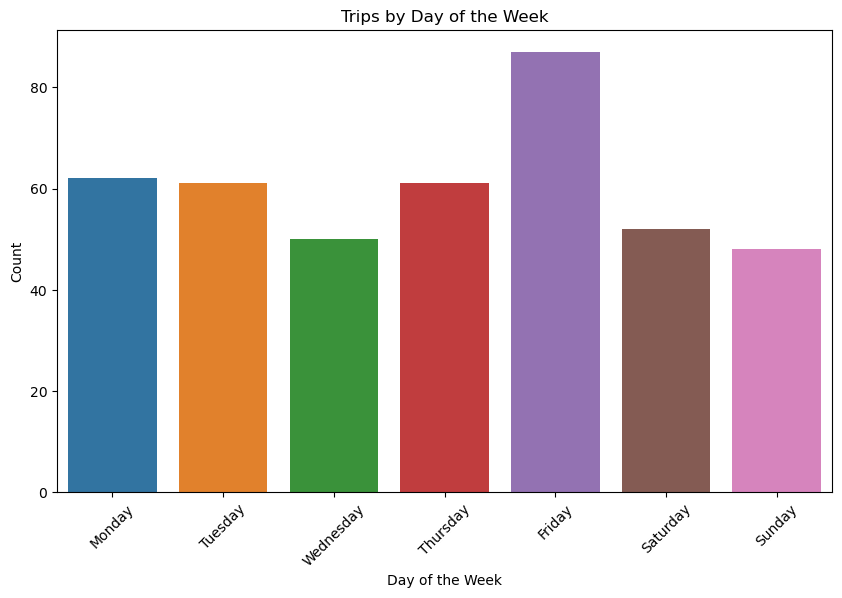

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DAY_OF_WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

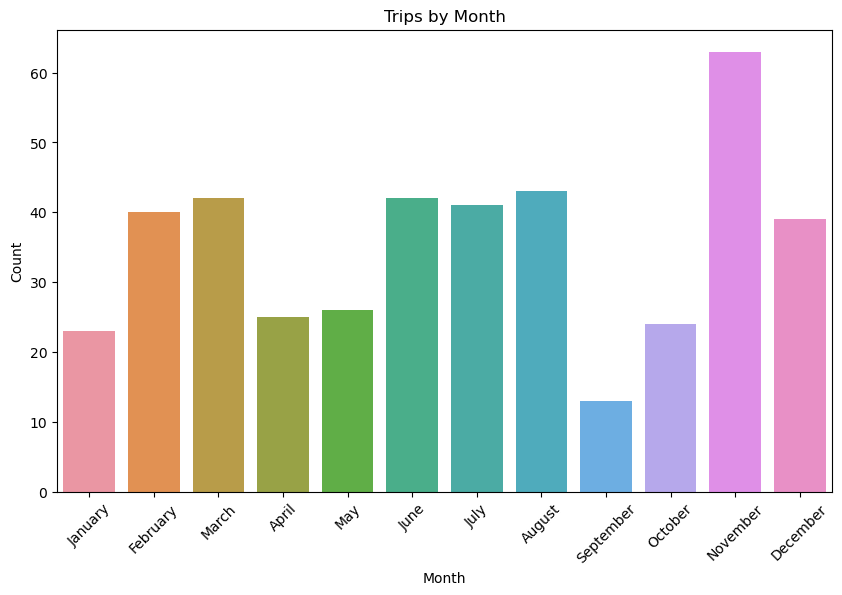

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MONTH', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Trips by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


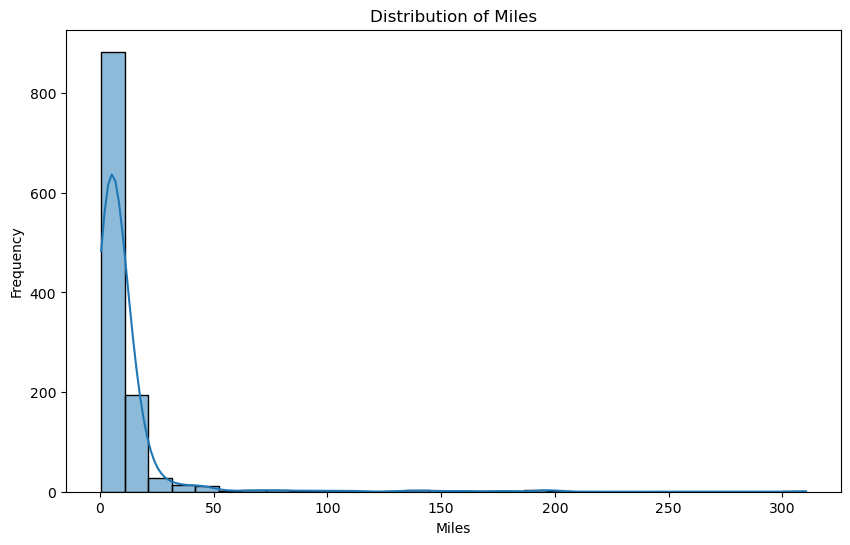

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MILES'], bins=30, kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

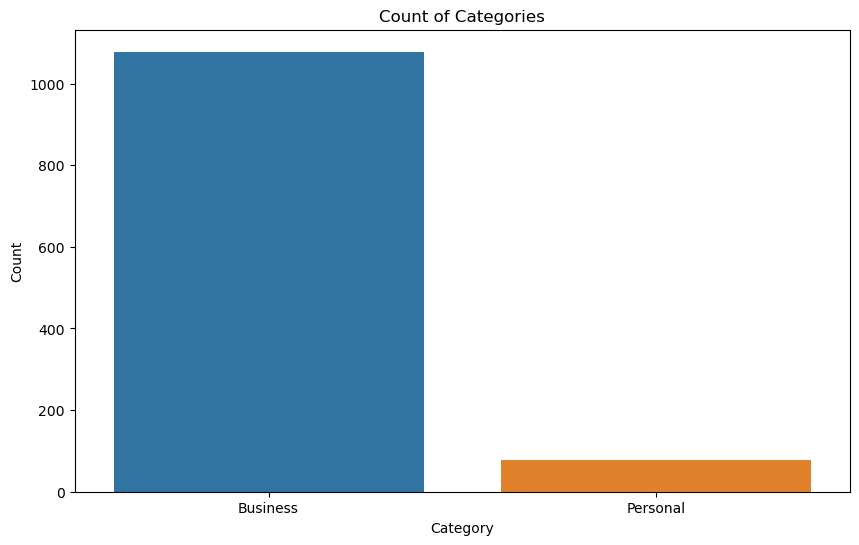

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='CATEGORY')
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

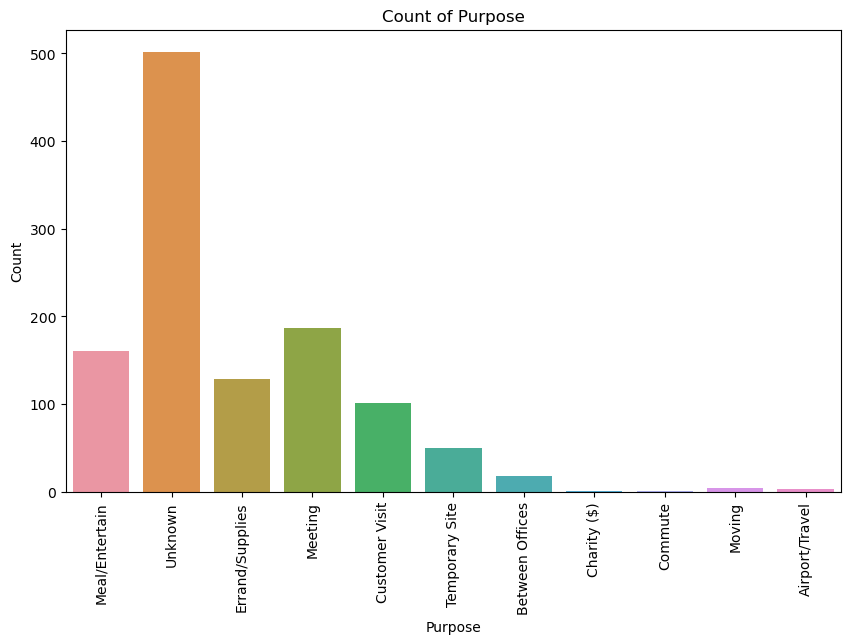

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data,x="PURPOSE")
plt.title('Count of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

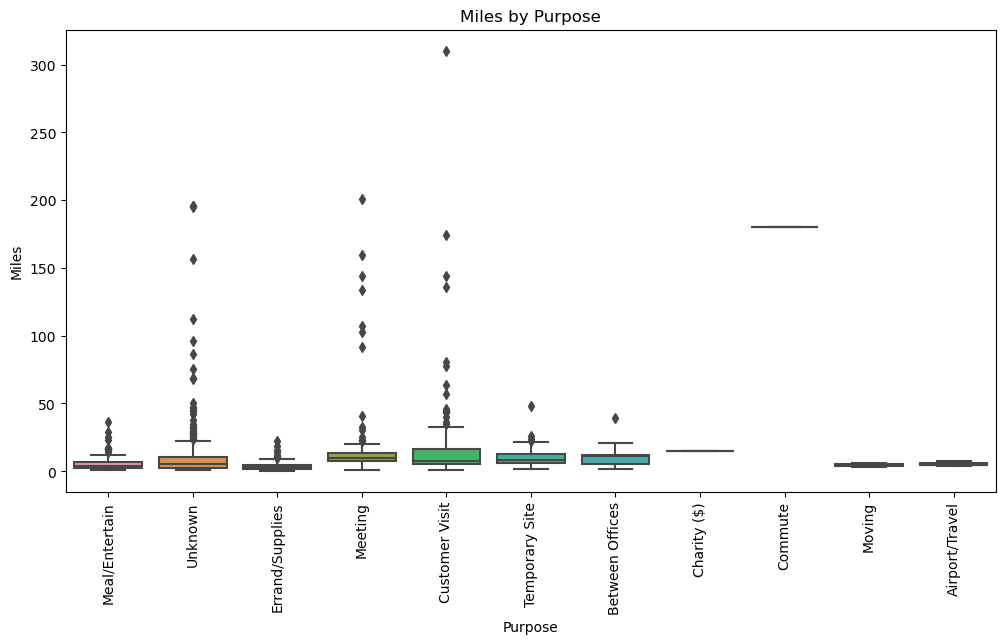

In [19]:
# Relationship between miles and purpose
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='PURPOSE', y='MILES')
plt.title('Miles by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Miles')
plt.xticks(rotation=90) 
plt.show()

In [38]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION,DAY_OF_WEEK,MONTH,Year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,NaT,NaT,5.1,Meal/Entertain,0.100000,Friday,January,2016.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,NaT,NaT,5.0,Unknown,0.200000,Saturday,January,2016.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,NaT,NaT,4.8,Errand/Supplies,0.216667,Saturday,January,2016.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,NaT,NaT,4.7,Meeting,0.233333,Tuesday,January,2016.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,NaT,NaT,63.7,Customer Visit,1.116667,Wednesday,January,2016.0


In [40]:
data.drop(['START','STOP','Year'],axis=1,inplace=True)

In [41]:
data.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,TRIP_DURATION,DAY_OF_WEEK,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,0.100000,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,Unknown,0.200000,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,0.216667,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,0.233333,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,1.116667,Wednesday,January


In [43]:
data.drop('TRIP_DURATION',axis=1,inplace=True)

In [44]:
data.isna().sum()

START_DATE     734
END_DATE       735
CATEGORY         0
MILES            0
PURPOSE          0
DAY_OF_WEEK    734
MONTH          734
dtype: int64

In [48]:
data['DAY_OF_WEEK'].unique()

array(['Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday', nan], dtype=object)

In [49]:
default_date = pd.Timestamp('2024-01-01 00:00:00') 

In [50]:
data['START_DATE'] = data['START_DATE'].fillna(default_date)
data['END_DATE'] = data['END_DATE'].fillna(default_date)

In [51]:
data.isna().sum()

START_DATE       0
END_DATE         0
CATEGORY         0
MILES            0
PURPOSE          0
DAY_OF_WEEK    734
MONTH          734
dtype: int64

In [52]:
data['MONTH'].fillna('Unknown', inplace=True)
data['DAY_OF_WEEK'].fillna('Unknown', inplace=True)

In [53]:
data.isna().sum()

START_DATE     0
END_DATE       0
CATEGORY       0
MILES          0
PURPOSE        0
DAY_OF_WEEK    0
MONTH          0
dtype: int64

In [54]:
data.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,DAY_OF_WEEK,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,Unknown,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,Wednesday,January


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [56]:
label_encoders = {}
for column in ['CATEGORY', 'DAY_OF_WEEK', 'MONTH']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [57]:
data['PURPOSE'] = LabelEncoder().fit_transform(data['PURPOSE'])

In [58]:
features = ['CATEGORY', 'MILES', 'DAY_OF_WEEK', 'MONTH']
target = 'PURPOSE'

In [59]:
X = data[features]
y = data[target]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.45021645021645024
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         0
           4       0.25      0.18      0.21        22
           5       0.20      0.22      0.21        23
           6       0.42      0.38      0.40        34
           7       0.37      0.35      0.36        40
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         7
          10       0.60      0.67      0.64       100

    accuracy                           0.45       231
   macro avg       0.28      0.21      0.22       231
weighted avg       0.45      0.45      0.44       231



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla